# Step 1: Problem Definition

For Telco companies, it is very important to attract new customres while at the same time to ensure avoiding churn in order to grow their revenues. There are many factors can affect people terminating the contract such as better price offers, bad service experiences.

Churn analytics provides valuable insights to predict customer churn and also define the underlying reasons that drive it.

In this example, a basic machine learning pipeline based on a sample data set from Kaggle is build and performance of different model types is compared. The pipeline used for this example consists of 8 steps:

- Step 1: Problem Definition
- Step 2: Data Collection
- Step 3: Exploratory Data Analysis (EDA)
- Step 4: Feature Engineering
- Step 5: Train/Test Split
- Step 6: Model Evaluation Metrics Definition
- Step 7: Model Selection, Training, Prediction and Assessment


# Step 2: Data Collection
The data set for solving this classification problem is taken from Kaggle and originally  from the IBM sample data set collection (https://www.kaggle.com/blastchar/telco-customer-churn).

I've downloaded the dataset (.csv format) to a local folder, read into Jupyter notebook in a Pandas Dataframe format.

Later on the machine learning models are trained based on 80% of the sample data. The remaining 20% are used for testing the performance of the trained models and assess their predictive power with regards to "churn / not churn". 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Step 3: Exploratory Data Analysis

Goal of this step is to get an understanding of the data structure, conduct initial preprocessing, clean the data, identify patterns and inconsistencies in the data (i.e. skewness, outliers, missing values) and build and validate hypotheses.

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Get a summary on the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Get statistical information on numerical features.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Get each column's count of unique values and each of the values.
for i in df.columns:
    print(f"Unique count of column {i}: {df[i].nunique()}")
    print(f"{df[i].unique()}\n")

Unique count of column customerID: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique count of column gender: 2
['Female' 'Male']

Unique count of column SeniorCitizen: 2
[0 1]

Unique count of column Partner: 2
['Yes' 'No']

Unique count of column Dependents: 2
['No' 'Yes']

Unique count of column tenure: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique count of column PhoneService: 2
['No' 'Yes']

Unique count of column MultipleLines: 3
['No phone service' 'No' 'Yes']

Unique count of column InternetService: 3
['DSL' 'Fiber optic' 'No']

Unique count of column OnlineSecurity: 3
['No' 'Yes' 'No internet service']

Unique count of column OnlineBackup: 3
['Yes' 'No' 'No internet service']

Unique count of column DeviceProtection: 3
['No' 'Yes' 'No internet s

## Meaning of Features
By inspecting the columns and their unique values, a general understanding about the features. The features can also be grouped into different categories:

### Classification labels

- Churn - Whether the customer churned or not (Yes or No)

### Customer services

- PhoneService - Whether the customer has a phone service or not (Yes, No)
- MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

### Customer account information

- Tenure - Number of months the customer has stayed with the company
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
 
### Customers demographic info

- customerID - Customer ID
- Gender - Whether the customer is a male or a female
- SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
- Partner - Whether the customer has a partner or not (Yes, No)
- Dependents - Whether the customer has dependents or not (Yes, No)

## Data Preprocessing

In [6]:
# Changing the data type of "TotalCharges" and "tenure" to float.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

def feature_to_float(feature_list, df):
    for i in feature_list:
        df[i] = df[i].astype(float)
    return df

feature_to_float(['tenure'], df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [7]:
# Renaming the data values of "PaymentMethod" for better readability.
payment_column = {'Electronic check': 'E-Check' , 'Mailed check': 'Mailed Check', 'Bank transfer (automatic)': 'Bank Transfer', 'Credit card (automatic)': 'Credit Card'}
df["PaymentMethod"].replace(payment_column, inplace=True)

In [8]:
# Checking the data types again.
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
# Counting the number of missing values.
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values for "TotalCharges". The respective data entries will be removed for simplicity.

## Hypothesis Building

Looking at the data and assisted by visualiztions the following hypotheses can be made:

- The longer the contract duration the less likely it is that the customer will churn as he/she is less frequently confronted with the termination/prolongation decision and potentially values contracts with reduced effort.
- Customers are willing to cancel simple contracts with few associated product components quicker and more often than complexer product bundles - for bundles customers value the reduced administrative complexity. They might also be hesitant to cancel a contract, when they depend on the additional service components (e.g. security packages).
- Customers with spouses and children might churn less to keep the services running for their family.
- Tenure, contract duration terms and number of additional services are assumed to be among the most important drivers of churn.
- More expensive contracts lead to increased churn as the chances to save money by changing providers might be higher.
- Senior citizens tend to churn less due to the extended effort associated with terminating contracts.

# Data Exploration

In [10]:
# plots style
plt.style.use("fivethirtyeight")

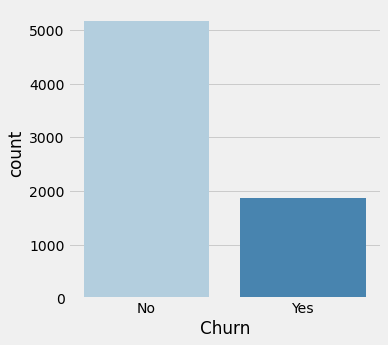

In [11]:
# Display a frequency distribution for churn. 
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df['Churn'], palette="Blues", linewidth=1)
plt.show()

The plot shows a class imbalance of the data between churners and non-churners. To address this, resampling would be a suitable approach. To keep this case simple, the imbalance is kept forward and specific metrics are chosen for model evaluations.

In [12]:
# Create a function to generate boxplots.
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def boxplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)
        
    return plt.show()

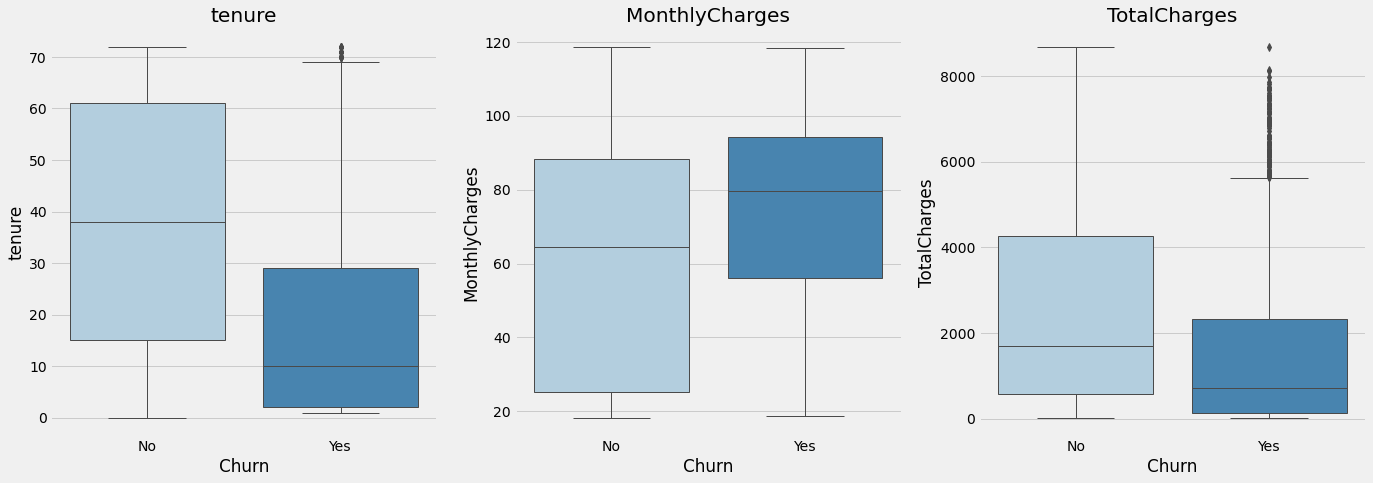

In [13]:
# Generate boxplots for tenure, MonthlyCharges and TotalCharges.
boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], df)

Plot insights:

- Churning customers have much lower tenure with a median of ca. 10 months compared to a median of non-churners of ca. 38 months.
- Churning customers have higher monthly charges with a median of ca. 80 USD and much lower interquartile range compared to that of non-churners (median of ca. 65 USD).
- TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual basis.

In [14]:
# Create a function to generate countplots:
def countplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

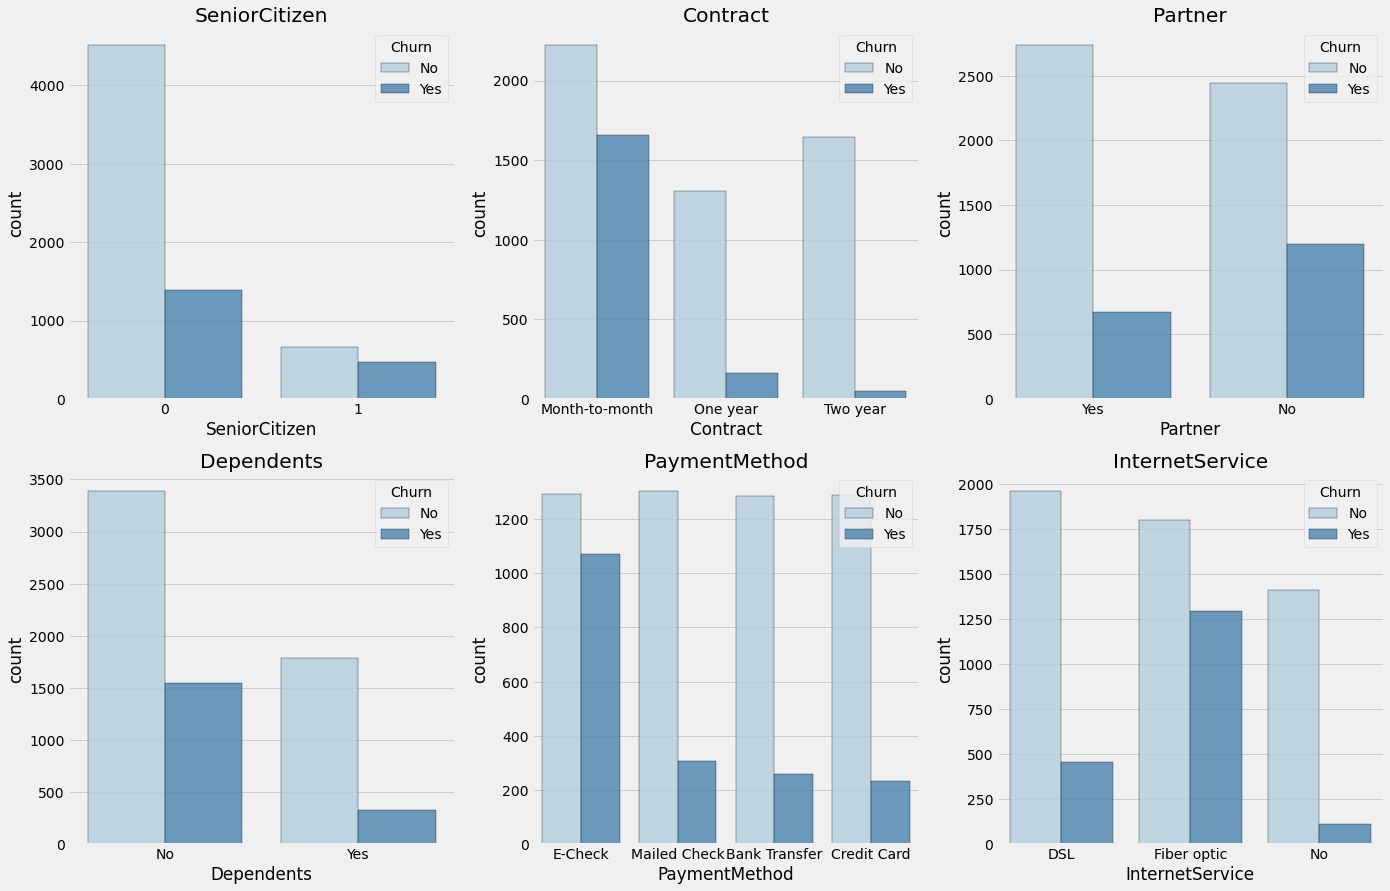

In [15]:
# Generate countplots for various features.
countplot("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], df)

Plot insights:

- Senior citizens churn rate is much lower than non-senior churn rate.
- Churn rate for month-to-month contracts much higher that for other contract durations.
- Moderately higher churn rate for customers without partners.
- Much higher churn rate for customers without children.
- Payment method electronic check shows much higher churn rate than other payment methods.
- Customers with InternetService fiber optic as part of their contract have much higher churn rate.

## Check for Outliers in Numerical Features

In [16]:
# Check of outliers by applying the IQR method 
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = df[numerical_features]
df_num.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [17]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

-> No outliers in numerical features detected with the IQR method - no adjustments required.

## Data Cleaning

In [18]:
# Drop the rows with missing values.
df = df.dropna()

# Step 4: Feature Engineering
In feature engineering, the steps identified at the end of EDA are executed. Additionally, a new feature is generated from extisting features and a correlation analysis is conducted after all features have been transformed to numerical.

### Feature Engineering Actions
Based on the data types and the values, following actions are defined to preprocess/engineer the features for machine readibility and further analysis:

**Columns removed**

- customerID: not relevant

**No action**
- SeniorCitizen

**Label encoding** The following features are categorical and each take on 2 values (mostly yes/no) - therefore are transformed to binary integers (0,1)

- gender
- Partner
- Dependents
- Churn
- PhoneService
- PaperlessBilling

**One-Hot Encoding** The following features are categorical, yet not ordinal (no ranking) but take on more than 2 values. For each value, a new variable is created with a binary integer indicating if the value occured in a data entry or not (1 or 0).

- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaymentMethod

**Min-Max Scaling** Values of numerical features are rescaled between a range of 0 and 1. Min-max scaler is the standard approach for scaling. For normally distributed features standard scaler could be used, which scales values around a mean of 0 and a standard deviation of 1. For simplicity we use min-max scaler for all numerical features.

- tenure
- TotalCharges
- MonthlyCharges

In [19]:
# Drop customerID feature
df = df.drop(columns='customerID')

In [20]:
# Generate new feature "Number_AdditionalServices" by summing up the number of add-on services consumed.
df['Number_AdditionalServices'] = (df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)

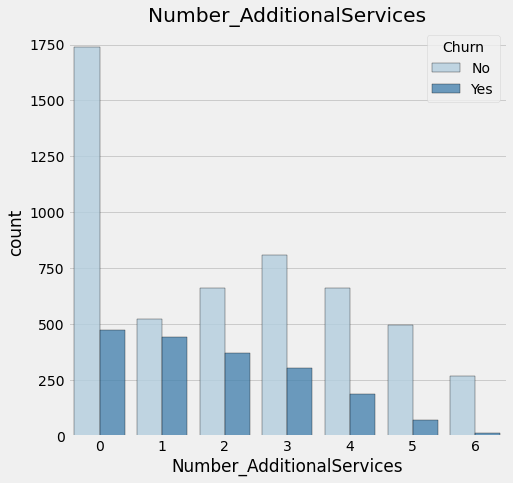

In [21]:
# Generate countplot for the new feature.
countplot('Churn', ['Number_AdditionalServices'], df)

Plot insights:

- The countplot shows a very high churn rate for customers that have 0 or 1 additional service.
- Customers with a very high number of additional services do have a low churn rate.

**Label Encoding**

In [22]:
# Label encoding for identified columns.
features_le = ['gender', 'Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'Yes': 1, 'No': 0})
    return       

label_encoding(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], df)

df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

**One-Hot-Encoding**

In [23]:
# One-Hot-Encoding for identified columns.
features_ohe = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices']

df = pd.get_dummies(df, columns=features_ohe) 

**Feature Rescaling: Min-Max-Scaling**

In [24]:
# Min-Max-Scaling for identified columns.
from sklearn.preprocessing import MinMaxScaler

features_mms = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_features_mms = pd.DataFrame(df, columns=features_mms)
df_remaining_features = df.drop(columns=features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=df_remaining_features.index)

df = pd.concat([df_remaining_features, df_rescaled_features], axis=1)

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0.000000,0.115423,0.001275
1,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0.464789,0.385075,0.215867
2,0,0,0,0,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0.014085,0.354229,0.010310
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0.619718,0.239303,0.210241
4,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0.014085,0.521891,0.015330


**Correlation analysis**

<AxesSubplot:>

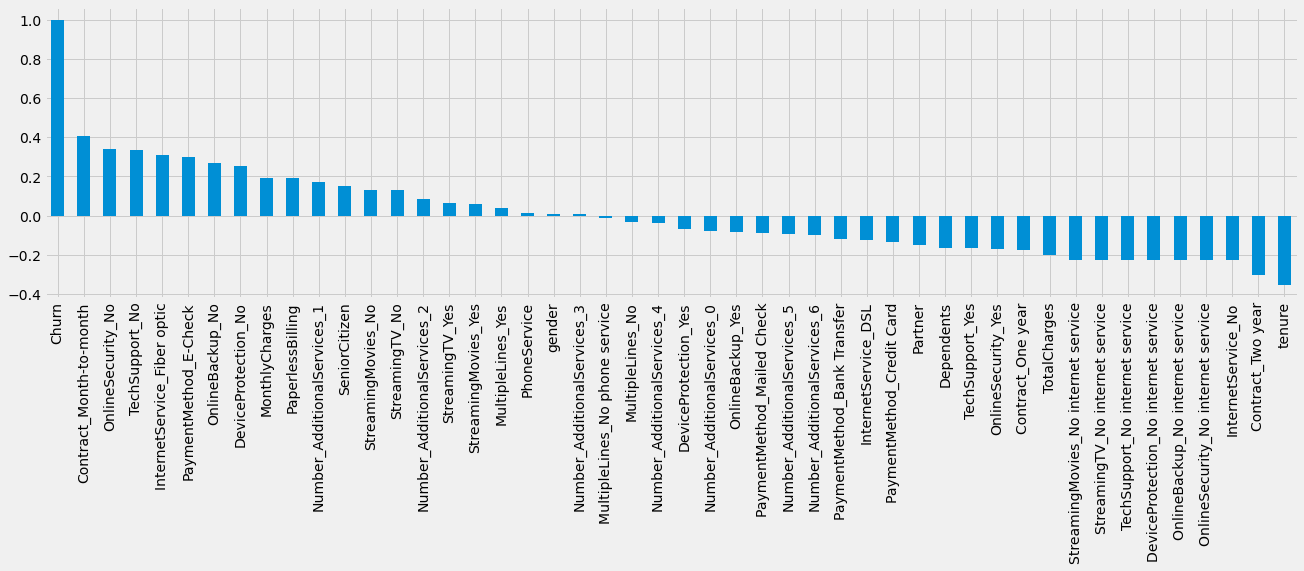

In [26]:
# Show correlation plot for correlation of Churn with each of the remaining features.
plt.figure(figsize=(16,10))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

# Step 5: Train-Test-Split

For conduction of model training and testing steps, the data set is split into 80% training data and 20% test data. The "Churn" column is defined as the class (the "y"), the remaining columns as the features (the "X"). 

In [27]:
#Applying sklearn's splitter function train_test_split 
from sklearn.model_selection import train_test_split

X1 = df.drop('Churn', axis=1)
X = X1.values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Evaluation Metrics

For performance assessment of the chosen models, various metrics are used:
- **Feature weights:** Indicates the top features used by the model to generate the predictions
- **Confusion matrix:** Shows a grid of true and false predictions compared to the actual values
- **Accuracy score:** Shows the overall accuracy of the model for training set and test set
- **ROC Curve:** Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false positive rate (FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)
- **AUC (for ROC):** Measures the overall separability between classes of the model related to the ROC curve
- **Precision-Recall-Curve:** Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance 
- **F1 Score:** Builds the harmonic mean of precision and recall and thereby measures the compromise between both.
- **AUC (for PRC):** Measures the overall separability between classes of the model related to the Precision-Recall curve

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

In [29]:
# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")

In [30]:
# Define a function that plots the confusion matrix for a classifier and the train and test accuracy
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

In [31]:
# Define a function that plots the ROC curve and the AUC score
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [32]:
# Define a function that plots the precision-recall-curve and the F1 score and AUC score
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

# Step 7: Model Selection, Training, Prediction and Assessment

Now we will test out the following models and measure their performance by several metrics. 

- **K Nearest Neighbors** - fast, simple and instance-based
- **Logistic Regression** - fast and linear model
- **Random Forest** - slower but accurate ensemble model based on decision trees
- **Support Vector Machines** - slower but accurate model used here in the non-linear form

**K Nearest Neighbors**

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciate and train the KNN classifier based on the training set.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained classifier on the test set.
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

C:\Users\dandi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\dandi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


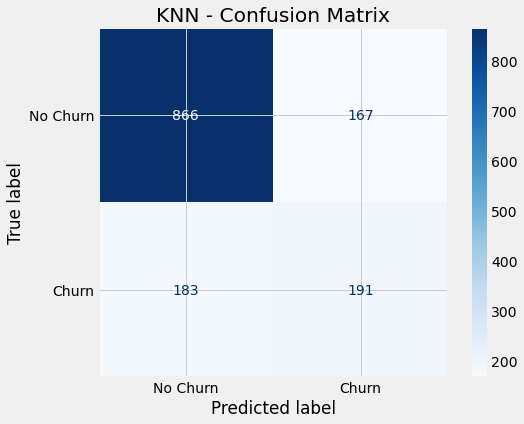

C:\Users\dandi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


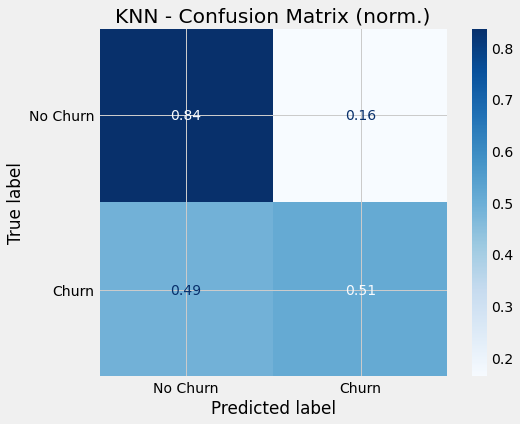

Accuracy Score Test: 0.7512437810945274
Accuracy Score Train: 0.8408888888888889 (as comparison)



C:\Users\dandi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, y_pred_knn, 'KNN')


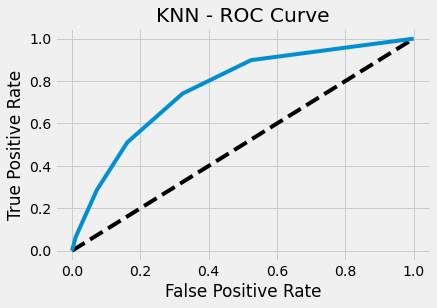

AUC Score (ROC): 0.7641299677487823



In [35]:
roc_curve_auc_score(X_test, y_test, y_pred_knn_prob, 'KNN')


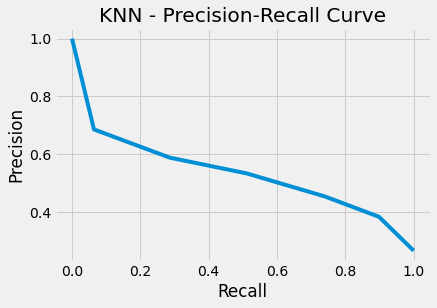

F1 Score: 0.5218579234972678 
AUC Score (PR): 0.5337587548717432



In [36]:
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')

**Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression

# Instanciate and train the logistic regression model based on the training set.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

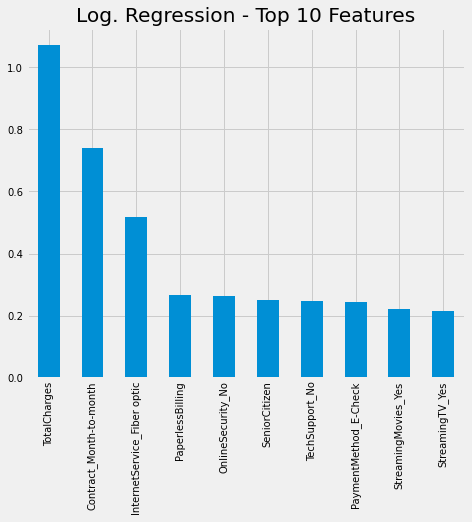

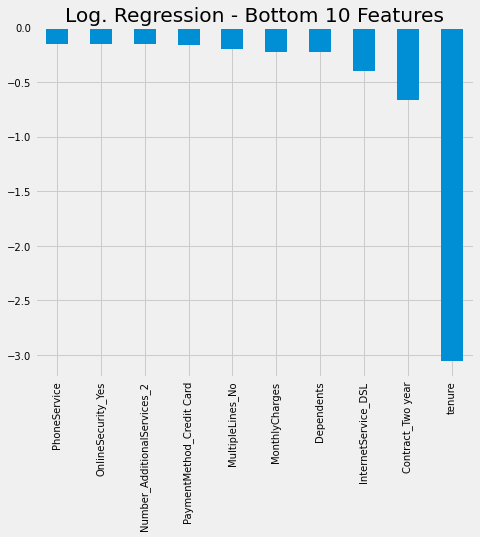

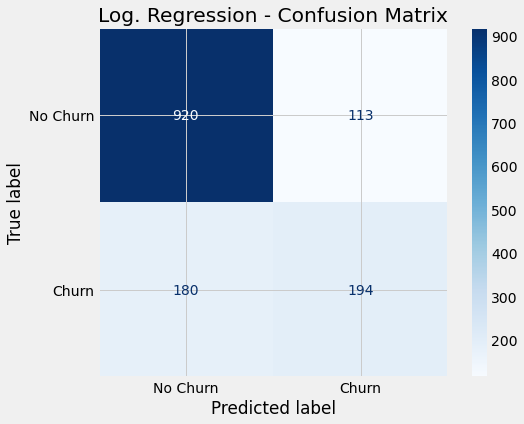

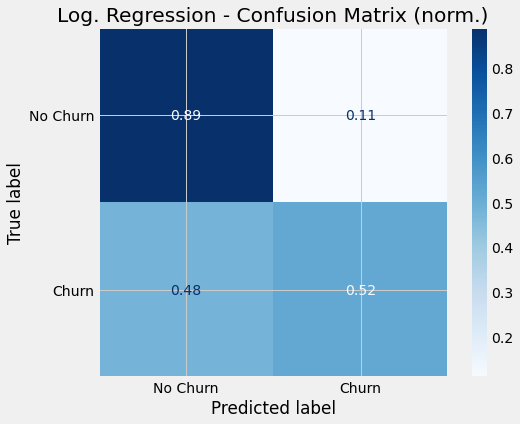

Accuracy Score Test: 0.7917555081734187
Accuracy Score Train: 0.8072888888888888 (as comparison)



In [40]:
# Plot model evaluations.
feature_weights(X1, logreg, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, 'Log. Regression')

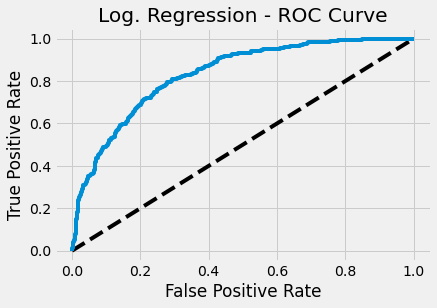

AUC Score (ROC): 0.8318484658670295



In [41]:
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')

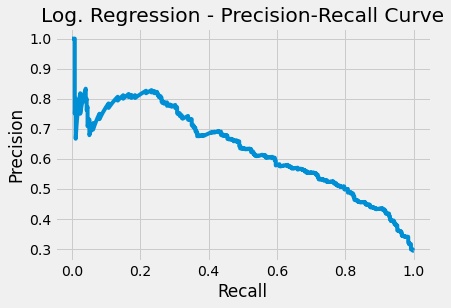

F1 Score: 0.5697503671071952 
AUC Score (PR): 0.6302850699475259



In [42]:
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')

**Random Forest**

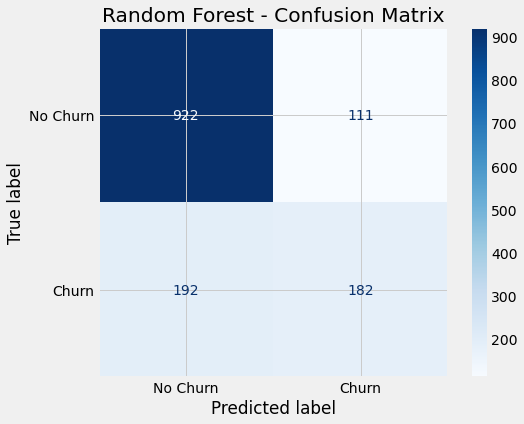

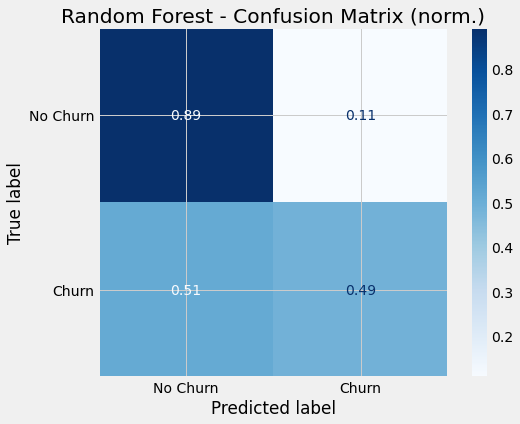

Accuracy Score Test: 0.7846481876332623
Accuracy Score Train: 0.9976888888888888 (as comparison)



In [43]:
from sklearn.ensemble import RandomForestClassifier

# Instanciate and train the random forest model based on the training set.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf, 'Random Forest')



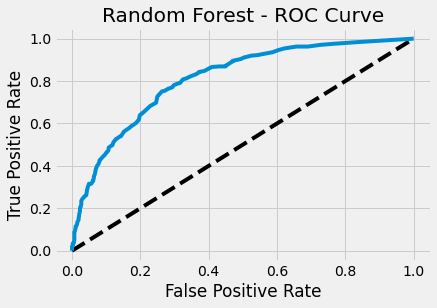

AUC Score (ROC): 0.8096285156674656



In [44]:
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')

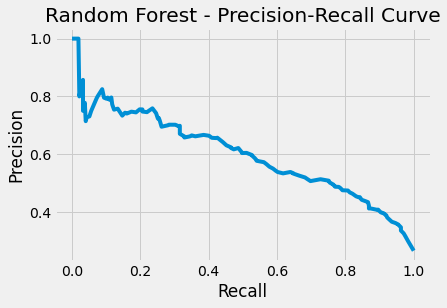

F1 Score: 0.545727136431784 
AUC Score (PR): 0.6004134970780285



In [45]:
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')

**Support Vector Machine**

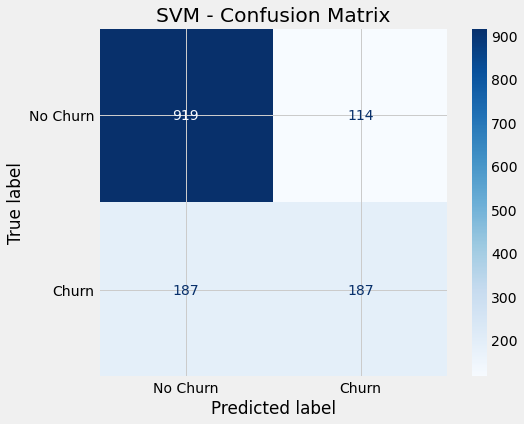

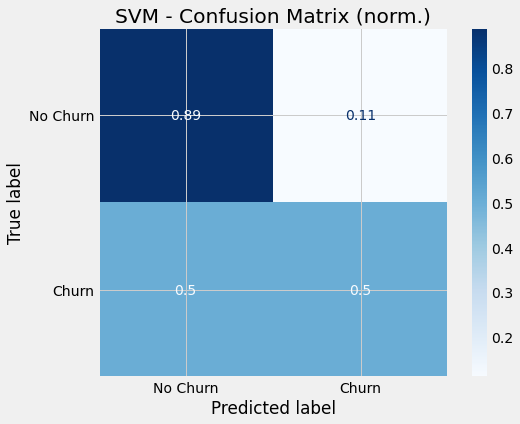

Accuracy Score Test: 0.7860696517412935
Accuracy Score Train: 0.8190222222222222 (as comparison)



In [46]:
from sklearn.svm import SVC

# Instanciate and train the SVM model on the training set.
support_vector_m = SVC(kernel='rbf', probability=True) 
support_vector_m.fit(X_train,y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')



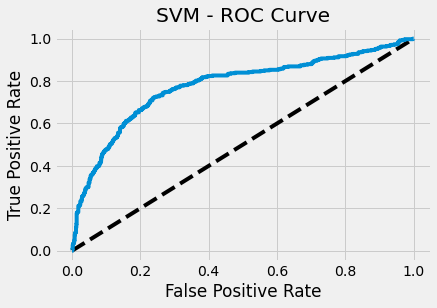

AUC Score (ROC): 0.7763341805964663



In [47]:
roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')

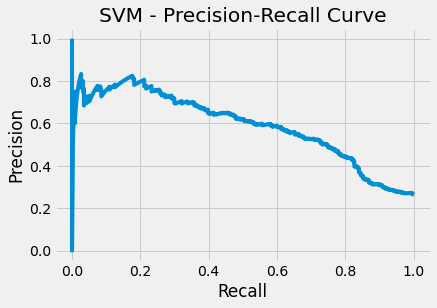

F1 Score: 0.554074074074074 
AUC Score (PR): 0.5888805911229047



In [48]:
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')